In [2]:
# pip install lazypredict

Note: you may need to restart the kernel to use updated packages.Collecting lazypredict
     ---------------------------------------- 0.0/57.7 kB ? eta -:--:--
     ---------------------------------------- 57.7/57.7 kB ? eta 0:00:00
   ---------------------------------------- 0.0/98.2 kB ? eta -:--:--
   ---------------------------------------- 98.2/98.2 kB ? eta 0:00:00
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   --------------------- ------------------ 0.8/1.4 MB 16.6 MB/s eta 0:00:01
   ---------------------------------------  1.4/1.4 MB 15.3 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 15.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/78.5 kB ? eta -:--:--
   ---------------------------------------- 78.5/78.5 kB 4.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.7/124.9 MB 20.5 MB/s eta 0:00:07
   -------------------------


[notice] A new release of pip is available: 23.3.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from lazypredict.Supervised import LazyRegressor
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Read the data
df = pd.read_csv('Brazil fipe_2022.csv')  # Replace with your actual path

# Prepare features (X) and targets (y)
# X = df[['fipe_code', 'authentication', 'avg_price', 'age_years']]
inputs = df.drop(['fipe_code', 'authentication', 'avg_price_brl', 'age_years'],axis='columns')
y = df[['avg_price_brl', 'age_years']]

      
 #----------------- 
from sklearn.preprocessing import LabelEncoder

le_month_of_reference = LabelEncoder()
le_brand = LabelEncoder()
le_model = LabelEncoder()
le_fuel = LabelEncoder()
le_gear = LabelEncoder()

inputs['month_of_reference_n']= le_month_of_reference.fit_transform(inputs['month_of_reference'])
inputs['brand_n']= le_brand.fit_transform(inputs['brand'])
inputs['model_n']= le_model.fit_transform(inputs['model'])
inputs['fuel_n']= le_fuel.fit_transform(inputs['fuel'])
inputs['gear_n']= le_gear.fit_transform(inputs['gear'])

X= inputs.drop(['month_of_reference', 'brand', 'model','fuel','gear'],axis='columns')
#    inputs_n.head()
#--------------------------------------------------------- 

In [5]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Prepare multi-output targets
y_train_price = y_train['avg_price_brl']
y_test_price = y_test['avg_price_brl']

# Run LazyPredict for regression
reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = reg.fit(X_train_scaled, X_test_scaled, y_train_price, y_test_price)


 98%|█████████████████████████████████████████████████████████████████████████████  | 41/42 [3:04:38<07:34, 454.07s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007216 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 459
[LightGBM] [Info] Number of data points in the train set: 232220, number of used features: 7
[LightGBM] [Info] Start training from score 122613.995999


100%|███████████████████████████████████████████████████████████████████████████████| 42/42 [3:04:39<00:00, 263.80s/it]


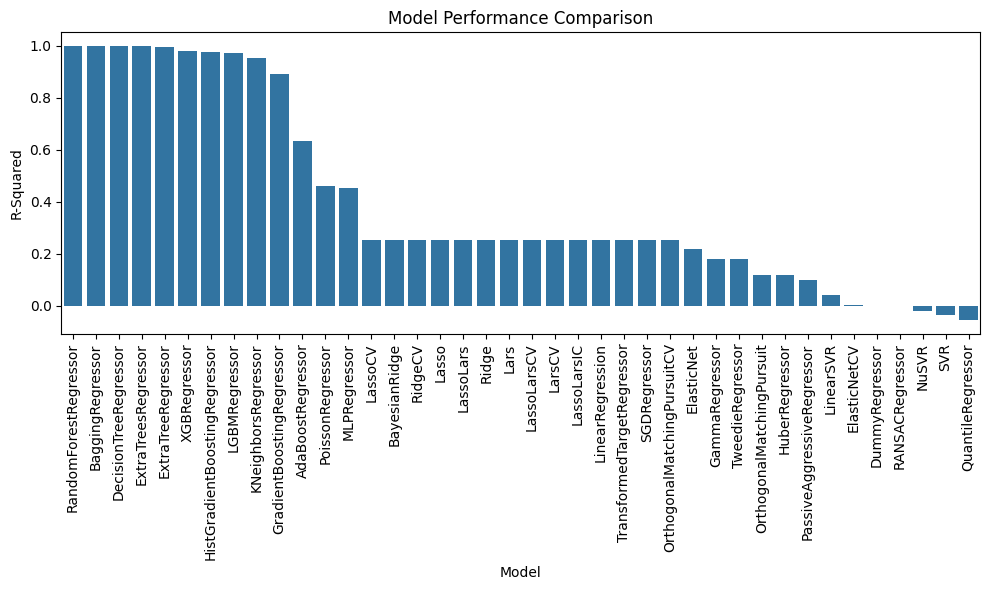

                               Adjusted R-Squared  R-Squared      RMSE  \
Model                                                                    
RandomForestRegressor                        1.00       1.00  13875.78   
BaggingRegressor                             1.00       1.00  14540.09   
DecisionTreeRegressor                        1.00       1.00  16183.77   
ExtraTreesRegressor                          1.00       1.00  18154.72   
ExtraTreeRegressor                           1.00       1.00  20481.77   
XGBRegressor                                 0.98       0.98  45208.07   
HistGradientBoostingRegressor                0.98       0.98  48900.19   
LGBMRegressor                                0.97       0.97  52808.31   
KNeighborsRegressor                          0.95       0.95  69173.52   
GradientBoostingRegressor                    0.89       0.89 103552.43   
AdaBoostRegressor                            0.63       0.63 189643.78   
PoissonRegressor                      

KeyError: 'MAE'

In [6]:
# Visualize model performance
plt.figure(figsize=(10, 6))
models.sort_values(by='R-Squared', ascending=False, inplace=True)
sns.barplot(x=models.index, y=models['R-Squared'])
plt.title('Model Performance Comparison')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Print detailed model performance
print(models)

# Advanced model comparison
detailed_results = {}
for model_name in models.index:
    print(f"\nDetailed Analysis for {model_name}")
    print("-" * 40)
    print(f"R-Squared: {models.loc[model_name, 'R-Squared']:.4f}")
    print(f"Mean Absolute Error: {models.loc[model_name, 'MAE']:.4f}")
    print(f"Mean Squared Error: {models.loc[model_name, 'MSE']:.4f}")
    print(f"Root Mean Squared Error: {models.loc[model_name, 'RMSE']:.4f}")

In [ ]:
df = pd.read_csv('small Brazil fipe_2022.csv')

 #----------------- 
from sklearn.preprocessing import LabelEncoder

inputs = df.drop(['fipe_code', 'authentication', 'avg_price_brl', 'age_years'],axis='columns')
y = df[['avg_price_brl', 'age_years']]

le_month_of_reference = LabelEncoder()
le_brand = LabelEncoder()
le_model = LabelEncoder()
le_fuel = LabelEncoder()
le_gear = LabelEncoder()

inputs['month_of_reference_n']= le_month_of_reference.fit_transform(inputs['month_of_reference'])
inputs['brand_n']= le_brand.fit_transform(inputs['brand'])
inputs['model_n']= le_model.fit_transform(inputs['model'])
inputs['fuel_n']= le_fuel.fit_transform(inputs['fuel'])
inputs['gear_n']= le_gear.fit_transform(inputs['gear'])

X= inputs.drop(['month_of_reference', 'brand', 'model','fuel','gear'],axis='columns')
#    inputs_n.head()
#------------------------